## Effective mass fitting example

Fitting effective mass using the unfolded band structure can be complex and not always reliable.
Here, we demostrate how it is one via the python API.  
For complex systems, a bit more tinkering will be needed.

In [1]:
from easyunfold.unfold import UnfoldKSet
from easyunfold.plotting import UnfoldPlotter
from easyunfold.effective_mass import EffectiveMass, fitted_band
from monty.serialization import loadfn

In [2]:
unfold = loadfn("easyunfold.json")
eff = EffectiveMass(unfold)
plotter = UnfoldPlotter(unfold)

The data file was generated with easyunfold 0.1.3, current 0.3.4.


Let's plot the effective band structure first

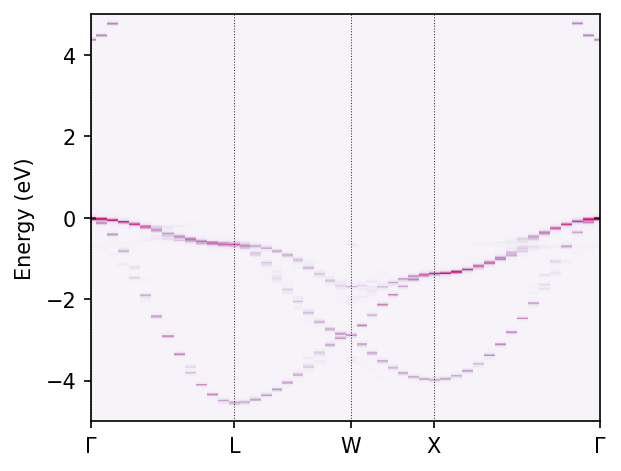

In [3]:
plotter.plot_spectral_function(*unfold.get_spectral_function(sigma=0.02),dpi=150);

Effective mass is sensitive to the details at the CBM/VBM. It can be useful to plot the spectral weights directly.  
In fact, the bands are extracted from the spectral weight rather than the spectral function.

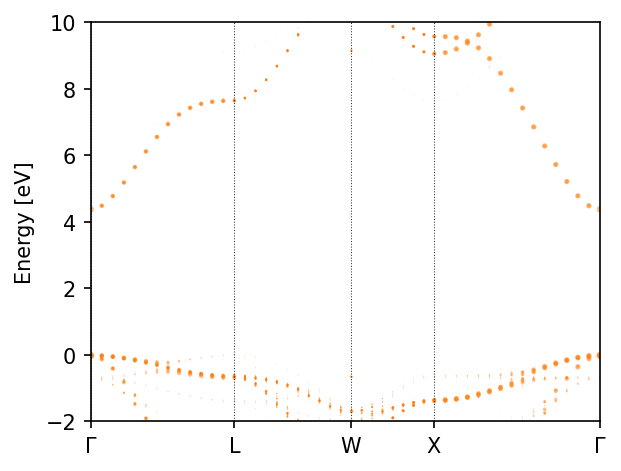

In [4]:
plotter.plot_spectral_weights(ylim=(-2, 10), factor=10);

### The effective mass data includes the raw data used for fitting - we can plot and see how good the fit is.

kpoints:  [0, 47] 
sub points:  [0, 0] 
bands:  [array([16]), array([16])]
Effective mass: 0.367 me


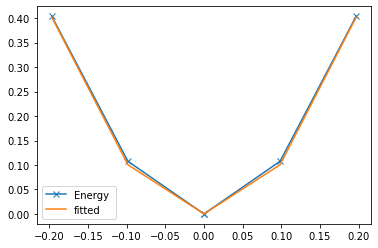

In [5]:
def plot_fit(np, data='electrons',ax=None):
    """Fit and plot effective mass"""
    eff = EffectiveMass(unfold, npoints=np, extrema_tol=0.1)
    ik, isubk, iband = eff.get_band_extrema()
    print('kpoints: ', ik, '\nsub points: ', isubk, '\nbands: ', iband) 
    data = eff.get_effective_masses(npoints=np)[data][1]
    # Checking the quality of the fit
    x = data['raw_data']['kpoint_distances']
    y = data['raw_data']['effective_energies']
    fit = data['raw_data']['fit_res']
    eff = data['effective_mass']
    print(f'Effective mass: {eff:.3f} me')
    y1 = fitted_band(x, eff)
    if ax is None:
        fig, ax = plt.subplots(1,1)
    ax.plot(x, y, 'x-', label='Energy ')
    ax.plot(x, y1, label='fitted')
    ax.legend()
plot_fit(3)

We can also check for holes.
                

kpoints:  [0, 47] 
sub points:  [0, 0] 
bands:  [array([16]), array([16])]
Effective mass: -3.772 me


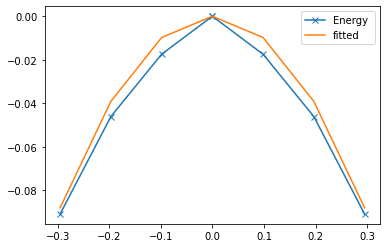

In [6]:
plot_fit(4, 'holes')

Fits for the holes are not as good as the electrons - those bands are much flatter and not so paranbolic.  
We can also investigate how the number of fitting points affect the rsults.

kpoints:  [0, 47] 
sub points:  [0, 0] 
bands:  [array([16]), array([16])]
Effective mass: 0.367 me
kpoints:  [0, 47] 
sub points:  [0, 0] 
bands:  [array([16]), array([16])]
Effective mass: 0.400 me
kpoints:  [0, 47] 
sub points:  [0, 0] 
bands:  [array([16]), array([16])]
Effective mass: 0.439 me
kpoints:  [0, 47] 
sub points:  [0, 0] 
bands:  [array([16]), array([16])]
Effective mass: 0.484 me


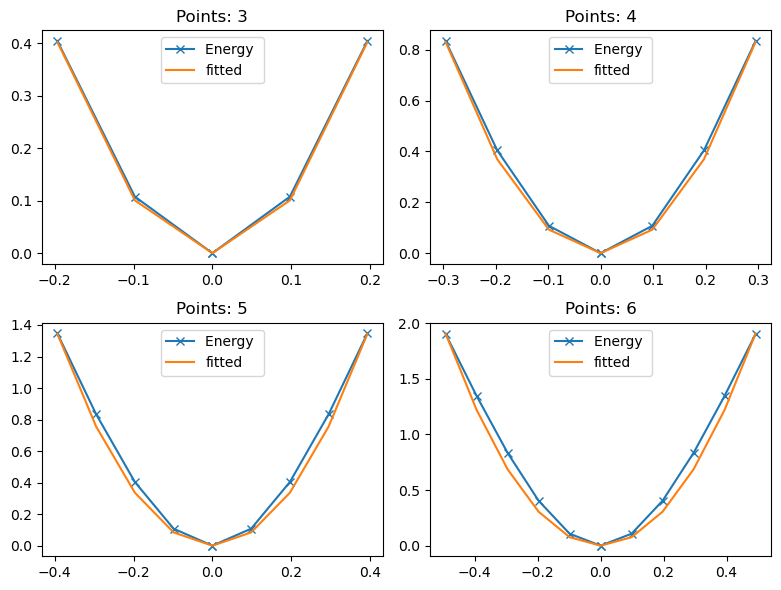

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6), dpi=100)
for ax, np in zip(axs.ravel(), [3, 4, 5, 6]):
    plot_fit(np, 'electrons', ax)
    ax.set_title(f'Points: {np}')
fig.tight_layout()

The effective masses increases as we increase the number of points, and it can be seen that the fit quality becomes worse.
This is because the included kpoints are no longer close to the CBM.

To obtain reliable effective mass, one should generate finely spaced kpoint paths that includes only the vicinity of the CBM/VBM.